In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd
from scipy.stats import norm, uniform, expon, t, probplot
import scipy.stats as st
from scipy.integrate import quad
from sympy.solvers import solve
from sympy import Symbol
import numpy as np
from pandas import Series, DataFrame
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from pandas.plotting import lag_plot

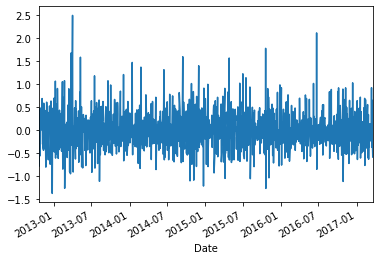

In [2]:
Tesla = pd.read_csv("Tesla.csv", sep="\t",header=0)
Tesla["Date"] = pd.DatetimeIndex(Tesla["Date"])
Tesla.set_index("Date", inplace=True)
Tesla["log_volume"] = np.log(Tesla["Volume"])
Tesla["log_return"] = Tesla["log_volume"] - Tesla["log_volume"].shift(1)
Tesla["log_return"].plot()

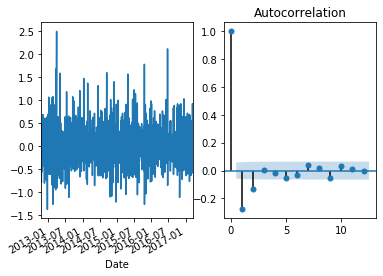

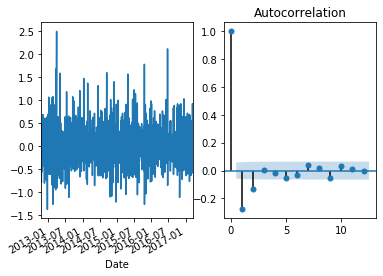

In [10]:
Tesla = pd.read_csv("Tesla.csv", sep="\t",header=0)
Tesla["Date"] = pd.DatetimeIndex(Tesla["Date"])
Tesla.set_index("Date", inplace=True)
Tesla["log_volume"] = np.log(Tesla["Volume"])
Tesla["log_return"] = Tesla["log_volume"] - Tesla["log_volume"].shift(1)
fig, (ax1, ax2) = plt.subplots(ncols=2)
Tesla["log_return"].plot(ax=ax1)
plot_acf(DataFrame(Tesla["log_return"]).dropna(), lags=12, ax=ax2)

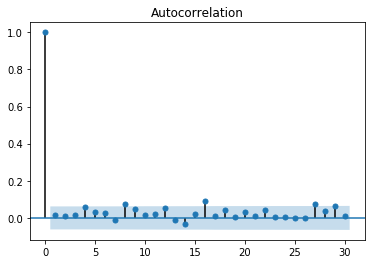

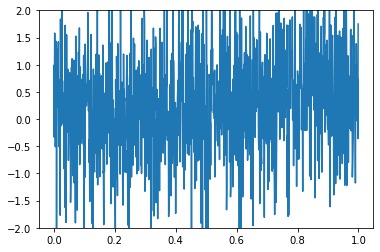

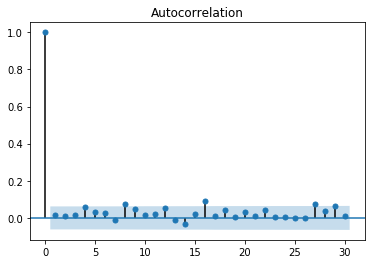

In [14]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf
t = np.linspace(0, 1, 1000, endpoint=False)
noise = np.random.normal(size=1000)
signal = 0.5*t
plt.plot(t, signal + noise)
plt.ylim(-2, 2)
acf(signal + noise)[1]
plot_acf(signal + noise)

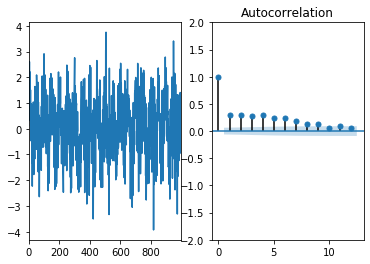

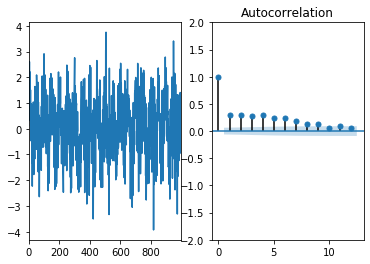

In [32]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
t = np.linspace(0, 1, 1000, endpoint=False)
noise = np.random.normal(size=1000)
signal = np.cos(2 * np.pi * 20 * t)
fig, (ax1, ax2) = plt.subplots(ncols=2)
Series(signal + noise).plot(ax=ax1)
plt.ylim(-2, 2)
plot_acf(DataFrame(signal+noise).dropna(), lags=12, ax=ax2)

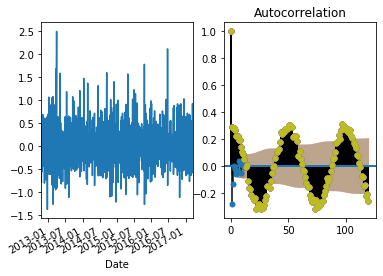

In [23]:
plot_acf(DataFrame(signal+noise).dropna(), lags=120, ax=ax2)

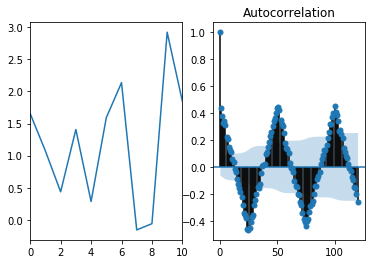

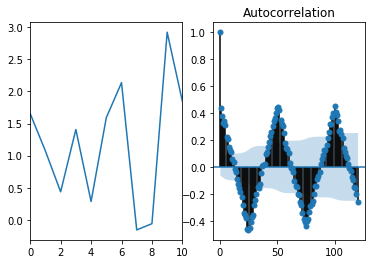

In [40]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
t = np.linspace(0, 1, 1000, endpoint=False)
noise = np.random.normal(size=1000)
fig, (ax1, ax2) = plt.subplots(ncols=2)
Series(signal.square(2 * np.pi * 20 * t) + noise).loc[:10].plot(ax=ax1)
plot_acf(DataFrame(signal.square(2 * np.pi * 20 * t) + noise).dropna(), lags=120,ax=ax2)

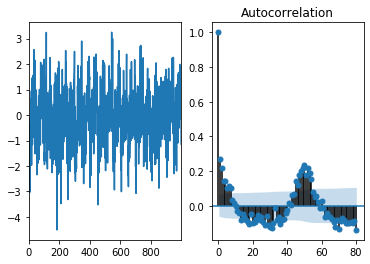

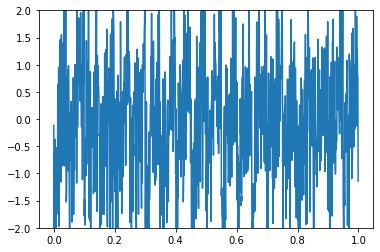

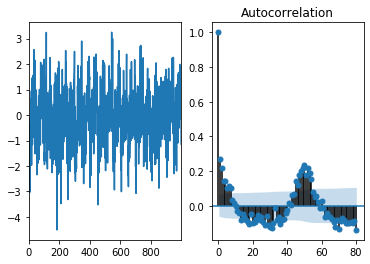

In [43]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
t = np.linspace(0, 1, 1000, endpoint=False)
noise = np.random.normal(size=1000)
signal = signal.sawtooth(2 * np.pi * 20 * t)
plt.plot(t, signal + noise)
plt.ylim(-2, 2)
fig, (ax1, ax2) = plt.subplots(ncols=2)
Series(signal+noise).plot(ax=ax1)
plot_acf(Series(signal+noise).dropna(), lags=80,ax=ax2)